# Credit card transaction fraud detection - Logistic Regression example

## Introduction

For many companies, losses involving transaction fraud amount to more than 10% of their total expenses. The concern with these massive losses leads companies to constantly seek new solutions to prevent, detect and eliminate fraud. Machine Learning is one of the most promising technological weapons to combat financial fraud.

The objective of this project is to create a simple Logistic Regression model capable of detecting fraud in credit card operations, thus seeking to minimize the risk and loss of the business. The biggest challenge is to create a model that is very sensitive to fraud, since most transactions are legitimate, making detection difficult.

The dataset used, contains transactions carried out by European credit card holders that took place over two days in September 2013.

It is a very unbalanced data set, that is, it has 492 fraud transactions, which represents only 0.172% of the 284,807 transactions.

The input variables are numeric, the result of a PCA transformation. Due to confidentiality issues, the original data and other complementary information were not made available.

The only variables that have not been transformed with the PCA are 'Time' and 'Value'. The variable 'Time' contains the seconds between each transaction and the first transaction in the data set. The 'Amount' variable refers to the amount of the transaction.

The 'Class' variable is the response variable (Target) and has a value "1" in case of fraud and "0" otherwise.

### Basic Libraries import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the dataset

In [2]:
df = pd.read_csv("creditcard.csv")

### Number of rows and columns

In [3]:
print('Total de linhas e colunas\n\n',df.shape,'\n')

Total de linhas e colunas

 (284807, 31) 



### Verification of the existence of null or missing values

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Variable type in each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Statistical information about the variables

In [6]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


### Statistical information in each class

In [7]:
print ('Not Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Not Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %     0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


*The average value of fraud transactions is 122.21 and for normal transactions, 88.29.

### Comparing the amount value of normal transactions versus fraud

Non Fraud %  99.83
Fraud %     0.17


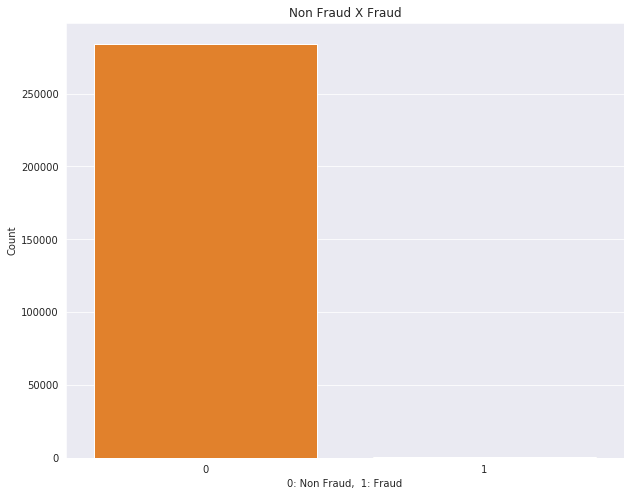

In [8]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

We can see the total of 284,807 transactions, 284,315 were labeled as normal (99.83%), and only 492 transactions were labeled as fraud (0.17%). Although it may seem small, each fraud transaction can represent a very significant expense, which together can represent billions of dollars of lost revenue each year.

### Separation of input variables from target variable

In [9]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [10]:
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [11]:
target

Index(['Class'], dtype='object')

With the dataset defined, separating the input variables from the target variable, we divided the data into training and test sets, importing the train_test_split function.

The train_test_split function uses a randomizer to separate data into training and test sets. In this case, 70% of the data for training and 30% for tests were defined.

The random seed (np.random.seed) is used to ensure that the same data is used for all runs.

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

### Building the Regression Logistic model

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### Training the model

In [14]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Confusion Matrix - Model performance measures

In [15]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [16]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

### Classification Report - Model performance measures

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [18]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test)

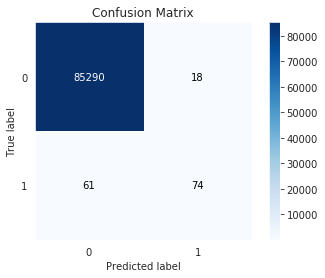

In [19]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [20]:
accuracy_score(y_test, pred)

0.9990754069964772

In [21]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.80      0.55      0.65       135

    accuracy                           1.00     85443
   macro avg       0.90      0.77      0.83     85443
weighted avg       1.00      1.00      1.00     85443



With the Logistic Regression Model, we have:

85290 transactions classified as normal and were actually normal;

18 transactions classified as fraud but that were really normal (type 1 error);

61 transactions classified as normal but which were fraud (type 2 error);

74 transactions classified as fraud and were actually fraud.

Thus, although the accuracy was excellent, the algorithm wrongly classified about 4 out of 10 fraudulent transactions.

Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model.

Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

** Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model. Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

### Undersampling and Oversampling - Working with unbalanced data

The application of methods for data balancing, such as undersampling and oversampling techniques are widely used in these cases. Changing the sampling makes the algorithm more "sensitive" to fraudulent transactions.

Undersampling is the technique of removing major class records from the sample. In this case, it is necessary to remove random records from the legitimate class (No fraud), in order to obtain a number of records close to the amount of the minority class (fraud) in order to train the model.

Oversampling is exactly the opposite: it means adding minority class records (fraud) to our training sample, thus increasing the overall proportion of fraud records. There are methods to generate samples from the minority class, either by duplicating existing records or artificially generating others.

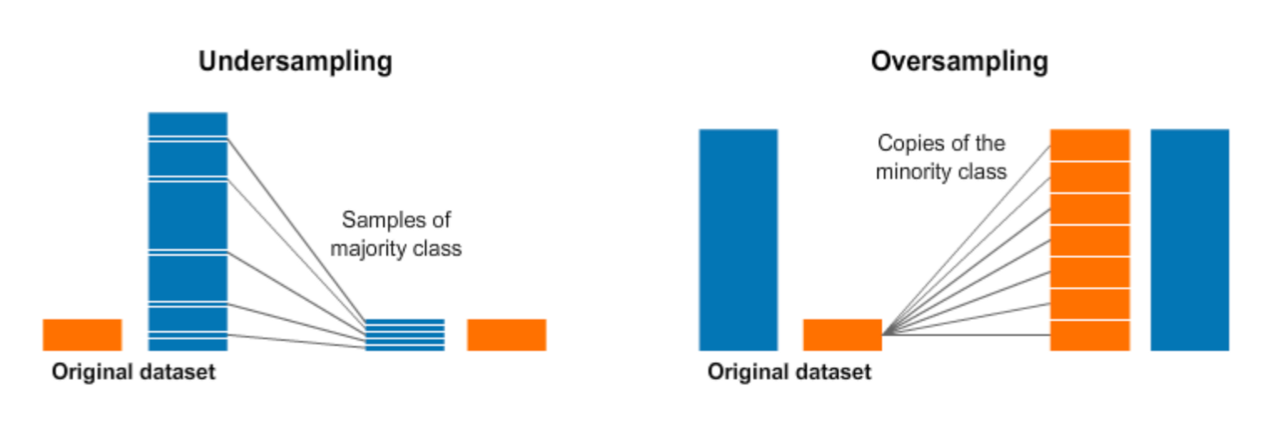

### Applying the undersampling technique

In this case, we will use the undersampling technique to obtain a uniform division between fraud and valid transactions. This will make the training set small, but with enough data to generate a good classifier.

In [22]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(df[df.Class == 1])

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
not_fraud_indices = df[df.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

### Using the "new" classifier for balanced data

In [23]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

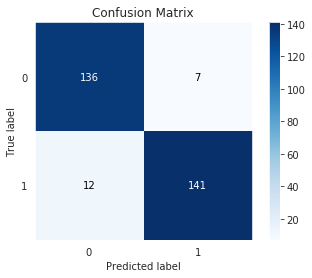

In [24]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [25]:
accuracy_score(Y_undersampled_test, pred)

0.9358108108108109

In [26]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       143
           1       0.95      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



Accuracy has decreased, but sensitivity has greatly increased. Looking at the confusion matrix, we can see a much higher percentage of correct classifications of fraudulent data.

Unfortunately, a greater number of fraud classifications almost always means a correspondingly greater number of valid transactions also classified as fraudulent.

### Using the "new" classifier for the original data test

In [27]:
lr_undersampled = LogisticRegression()
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

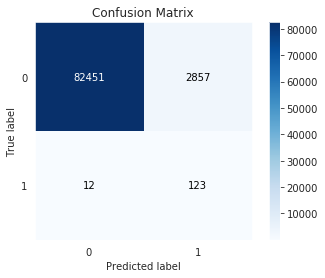

In [28]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [29]:
accuracy_score(y_test, pred)

0.9664220591505448

In [30]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



The algorithm was much better at capturing fraudulent transactions (61 classification errors at the beginning of the project to 12 current), but much worse at incorrectly labeling valid transactions (15 to 2857).

### GridSearchCV - Parameter optimization

The algorithms have several parameters that can be optimized. The best values for these parameters change as the data changes, as we add or remove features and as we change the other parameters as well.

One of the techniques that can be used to find the best values for these parameters is the Grid Search CV. You give him a list of possible values and the score used to measure the efficiency of the model, he will run Cross Validation with all possible combinations and at the end will inform which combination has the best score.

Once we have the best values, we pass them directly to the model. Only after some really significant changes in data and features can it be worth running again, depending on the base and the number of combinations.

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [1,2,3,4,5,6,7,8,9,10], 
              "penalty": ['l1','l2']} #Parameters
            
grid_search = GridSearchCV(lr, param_grid, scoring="precision") #score
grid_search.fit(y_test, pred)

lr = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

({'C': 1, 'penalty': 'l2'}, 0.9128655452493535)

### Application of the Model with balanced data and parameter optimization

In [32]:
lr_undersampled = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

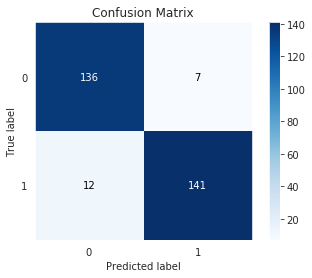

In [33]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [34]:
accuracy_score(Y_undersampled_test, pred)

0.9358108108108109

In [35]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       143
           1       0.95      0.92      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



### Application of the Model to the original data test

In [36]:
lr = LogisticRegression(C=1, penalty='l2')
cmat, pred = RunModel(lr, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

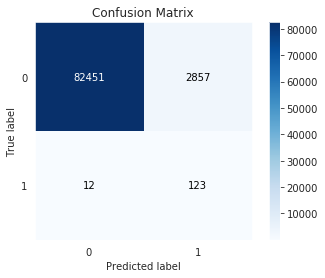

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [38]:
accuracy_score(y_test, pred)

0.9664220591505448

In [39]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85308
           1       0.04      0.91      0.08       135

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443



### Measurement of classifier performance through the ROC and AUC curve

The "ROC" curve is a probability curve that shows how much the classifier can distinguish between two things, through two parameters: the true-positive rate versus the false-positive rate, that is, the number of times the classifier hit the prediction against the number of times the classifier missed the prediction.

The "AUC" is derived from the "ROC" curve and represents the degree or measure of separability. The AUC summarizes the ROC curve in a single value, calculating the “area under the curve”. The higher the AUC the better the model is in predicting 0s as 0s and 1s as 1s. In this case, the higher the AUC the better the model is in distinguishing between fraudulent and normal transactions. The AUC value ranges from 0.0 to 1.0.

An excellent model has AUC close to 1, which means it has a good measure of separability. A poor model has AUC close to 0, which means that it has the worst measure of separability, that is, it is predicting 0s as 1s and 1s as 0s. And when the AUC is 0.5, it means that the model has no class separation capability.

In [40]:
from sklearn import metrics                           

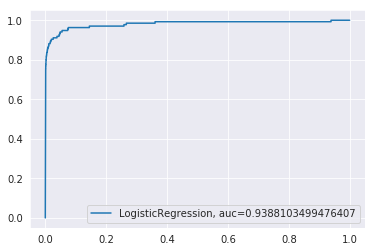

In [41]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(X_undersampled_train, Y_undersampled_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The classifier had a good result, with AUC of 0.94!

### Conclusion

We reached a very satisfactory number in detecting fraud transactions in relation to the initial model, rising from 55% to 91% of correctly identified transactions. In return, the detection of correctly identified normal transactions decreased from 99% to 97%.

Remember that we need to determine where this exchange is worthwhile. Generally, the costs of losing a fraudulent transaction are often greater than mistakenly classifying a good transaction as fraud. One of the challenges is to find the balance in training your model and proceed accordingly.

As a way to further improve the performance of the model, there are several ways to explore the input variables, performing some techniques of "Data Pre-Processing" and "Feature Engineering".